In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
try:
    address = "/content/drive/My Drive/Doctor/Research/CNN/Colab/results/"
    data_csv = pd.read_csv(address+'ny_data.csv', index_col=0)
except:
    address = "results/"
    data_csv = pd.read_csv(address+'ny_data.csv', index_col=0)

test_predict_AR    = pd.read_csv(address+'ny_predict_AR.csv', index_col=0)
test_predict_FNN   = pd.read_csv(address+'ny_predict_FNN.csv', index_col=0)
test_predict_LSTM  = pd.read_csv(address+'ny_predict_LSTM.csv', index_col=0)
test_predict_STCNN = pd.read_csv(address+'ny_predict_STCNN.csv', index_col=0)

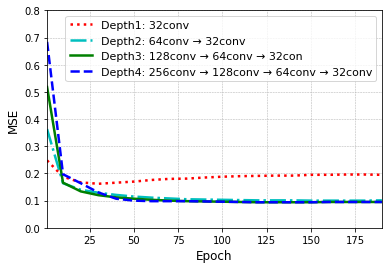

AR NRMSE : 11.129999999999999 %
FNN NRMSE : 10.8 %
LSTM NRMSE : 9.91 %
STCNN NRMSE : 8.53 %
AR MAPE : 6.38 %
FNN MAPE : 5.76 %
LSTM MAPE : 5.06 %
STCNN MAPE : 4.02 %
AR MASE : 2.0
FNN MASE : 1.8
LSTM MASE : 1.58
STCNN MASE : 1.26


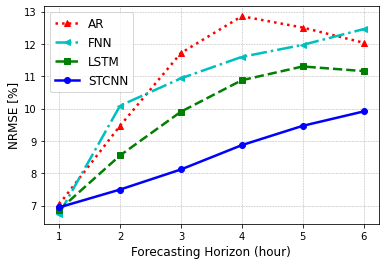

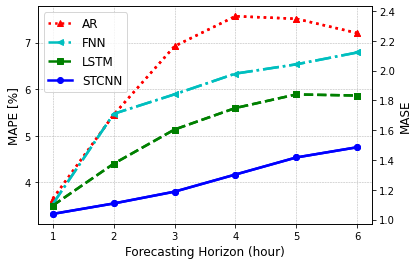

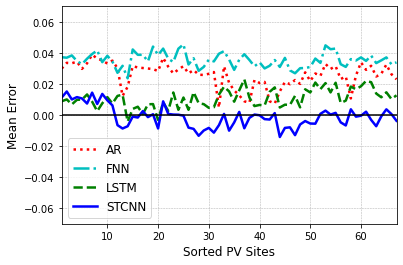

AR MAPE : 6.38 %
FNN MAPE : 5.76 %
LSTM MAPE : 5.06 %
STCNN MAPE : 4.02 %
AR MAPEa : 5.24 %
FNN MAPEa : 4.51 %
LSTM MAPEa : 3.9600000000000004 %
STCNN MAPEa : 2.7 %
AR MAPE Improvement : 17.87 %
FNN MAPE Improvement : 21.7 %
LSTM MAPE Improvement : 21.74 %
STCNN MAPE Improvement : 32.84 %


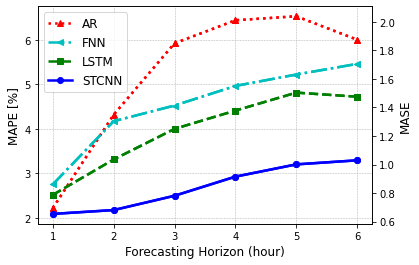

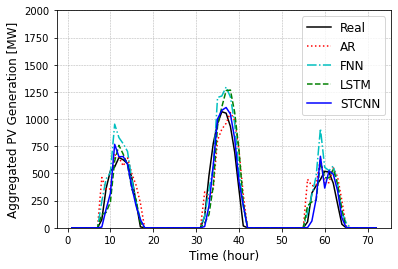

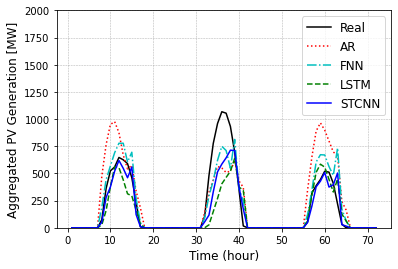

In [ ]:
site_no = data_csv.shape[1]
data = np.transpose(np.array(data_csv))

Gpast = 18 # The number of past data for input
Gpost = 6 # The number of post data for output
Gsize = len(data_csv)
GsizeT = int(Gsize*0.6)
GsizeV = int(Gsize*0.8)
Gbatch_size = 128
fontsize1 = 12

depthx = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190]
depth1 = [0.248,0.188,0.167,0.162,0.166,0.170,0.176,0.180,0.181,0.185,\
          0.188,0.190,0.191,0.192,0.192,0.195,0.195,0.196,0.196,0.195]
depth2 = [0.363,0.164,0.140,0.129,0.121,0.115,0.111,0.108,0.105,0.104,\
          0.103,0.102,0.101,0.101,0.101,0.100,0.100,0.100,0.100,0.101]
depth3 = [0.518,0.166,0.134,0.120,0.112,0.107,0.103,0.100,0.098,0.097,\
          0.096,0.095,0.094,0.094,0.094,0.094,0.095,0.095,0.095,0.095]
depth4 = [0.684,0.197,0.164,0.130,0.107,0.100,0.098,0.098,0.098,0.097,\
          0.096,0.095,0.094,0.094,0.094,0.094,0.095,0.095,0.095,0.095]

fig_selection = plt.figure()
plt.plot(depthx, depth1, "r:", linewidth=2.5, label="Depth1: 32conv")
plt.plot(depthx, depth2, "c-.", linewidth=2.5, label="Depth2: 64conv → 32conv")
plt.plot(depthx, depth3, "g-", linewidth=2.5, label="Depth3: 128conv → 64conv → 32con")
plt.plot(depthx, depth4, "b--", linewidth=2.5, label="Depth4: 256conv → 128conv → 64conv → 32conv")
plt.xlabel("Epoch", fontsize=fontsize1)
plt.ylabel("MSE", fontsize=fontsize1)
plt.xlim([1,190])
plt.ylim([0,0.8])
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=fontsize1-1, loc=1)
plt.show()

space_list = list(range(1,site_no+1))
time_list = list(range(1,Gpost+1))

test_output = np.zeros((Gsize-GsizeV-Gpast-Gpost+1, Gpost*site_no))
for i in range(Gsize-GsizeV-Gpast-Gpost+1):
    test_output[i,:] = np.reshape(data[:,GsizeV+i+Gpast:GsizeV+i+Gpast+Gpost], site_no*Gpost)

n = len(test_output)
test_output = np.reshape(test_output, (n,site_no,Gpost))
test_predict_AR = np.reshape(np.array(test_predict_AR), (n,site_no,Gpost))
test_predict_FNN = np.reshape(np.array(test_predict_FNN), (n,site_no,Gpost))
test_predict_LSTM = np.reshape(np.array(test_predict_LSTM), (n,site_no,Gpost))
test_predict_STCNN = np.reshape(np.array(test_predict_STCNN), (n,site_no,Gpost))

scale = 0
for j in range(1,n):
    scale += np.mean(abs(test_output[j,:,:] - test_output[j-1,:,:]))
scale = scale/(n-1)

rmse_AR = np.sqrt(np.mean(np.square(test_output - test_predict_AR)))
rmse_FNN = np.sqrt(np.mean(np.square(test_output - test_predict_FNN)))
rmse_LSTM = np.sqrt(np.mean(np.square(test_output - test_predict_LSTM)))
rmse_STCNN = np.sqrt(np.mean(np.square(test_output - test_predict_STCNN)))

mae_AR = np.mean(abs(test_output - test_predict_AR))
mae_FNN = np.mean(abs(test_output - test_predict_FNN))
mae_LSTM = np.mean(abs(test_output - test_predict_LSTM))
mae_STCNN = np.mean(abs(test_output - test_predict_STCNN))

print("AR NRMSE :", 100*round(rmse_AR,4), "%")
print("FNN NRMSE :", 100*round(rmse_FNN,4), "%")
print("LSTM NRMSE :", 100*round(rmse_LSTM,4), "%")
print("STCNN NRMSE :", 100*round(rmse_STCNN,4), "%")
print("AR MAPE :", 100*round(mae_AR,4), "%")
print("FNN MAPE :", 100*round(mae_FNN,4), "%")
print("LSTM MAPE :", 100*round(mae_LSTM,4), "%")
print("STCNN MAPE :", 100*round(mae_STCNN,4), "%")
print("AR MASE :", round(mae_AR/scale,2))
print("FNN MASE :", round(mae_FNN/scale,2))
print("LSTM MASE :", round(mae_LSTM/scale,2))
print("STCNN MASE :", round(mae_STCNN/scale,2))

rmse_AR_time = []
rmse_FNN_time = []
rmse_LSTM_time = []
rmse_STCNN_time = []

mae_AR_time = []
mae_FNN_time = []
mae_LSTM_time = []
mae_STCNN_time = []

for i in range(Gpost):
    rmse_AR_time += [100*np.sqrt(np.mean(np.square(test_output[:,:,i] - test_predict_AR[:,:,i])))]
    rmse_FNN_time += [100*np.sqrt(np.mean(np.square(test_output[:,:,i] - test_predict_FNN[:,:,i])))]
    rmse_LSTM_time += [100*np.sqrt(np.mean(np.square(test_output[:,:,i] - test_predict_LSTM[:,:,i])))]
    rmse_STCNN_time += [100*np.sqrt(np.mean(np.square(test_output[:,:,i] - test_predict_STCNN[:,:,i])))]
    
    mae_AR_time += [100*np.mean(abs(test_output[:,:,i] - test_predict_AR[:,:,i]))]
    mae_FNN_time += [100*np.mean(abs(test_output[:,:,i] - test_predict_FNN[:,:,i]))]
    mae_LSTM_time += [100*np.mean(abs(test_output[:,:,i] - test_predict_LSTM[:,:,i]))]
    mae_STCNN_time += [100*np.mean(abs(test_output[:,:,i] - test_predict_STCNN[:,:,i]))]

fig_rmse = plt.figure()
plt.plot(time_list, rmse_AR_time, "r:^", linewidth=2.5, label="AR")
plt.plot(time_list, rmse_FNN_time, "c-.<", linewidth=2.5, label="FNN")
plt.plot(time_list, rmse_LSTM_time, "g--s", linewidth=2.5, label="LSTM")
plt.plot(time_list, rmse_STCNN_time, "b-o", linewidth=2.5, label="STCNN")
plt.xlabel("Forecasting Horizon (hour)", fontsize=fontsize1)
plt.ylabel("NRMSE [%]", fontsize=fontsize1)
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=fontsize1)
plt.show()

fig_mae = plt.figure()
plt.plot(time_list, mae_AR_time, "r:^", linewidth=2.5, label="AR")
plt.plot(time_list, mae_FNN_time, "c-.<", linewidth=2.5, label="FNN")
plt.plot(time_list, mae_LSTM_time, "g--s", linewidth=2.5, label="LSTM")
plt.plot(time_list, mae_STCNN_time, "b-o", linewidth=2.5, label="STCNN")
plt.xlabel("Forecasting Horizon (hour)", fontsize=fontsize1)
plt.ylabel("MAPE [%]", fontsize=fontsize1)
plt.grid(linestyle='--', linewidth=0.5)
plt.twinx()
plt.plot(time_list, mae_AR_time/scale/100, "r:^", linewidth=2.5, label="AR")
plt.plot(time_list, mae_FNN_time/scale/100, "c-.<", linewidth=2.5, label="FNN")
plt.plot(time_list, mae_LSTM_time/scale/100, "g--s", linewidth=2.5, label="LSTM")
plt.plot(time_list, mae_STCNN_time/scale/100, "b-o", linewidth=2.5, label="STCNN")
plt.ylabel("MASE", fontsize=fontsize1)
plt.legend(fontsize=fontsize1)
plt.show()

me_AR_space = []
me_FNN_space = []
me_LSTM_space = []
me_STCNN_space = []

for i in range(site_no):
    me_AR_space += [np.mean(test_predict_AR[:,i,:] - test_output[:,i,:])]
    me_FNN_space += [np.mean(test_predict_FNN[:,i,:] - test_output[:,i,:])]
    me_LSTM_space += [np.mean(test_predict_LSTM[:,i,:] - test_output[:,i,:])]
    me_STCNN_space += [np.mean(test_predict_STCNN[:,i,:] - test_output[:,i,:])]

fig_me = plt.figure()
plt.plot(space_list, me_AR_space, "r:", linewidth=2.5, label="AR")
plt.plot(space_list, me_FNN_space, "c-.", linewidth=2.5, label="FNN")
plt.plot(space_list, me_LSTM_space, "g--", linewidth=2.5, label="LSTM")
plt.plot(space_list, me_STCNN_space, "b", linewidth=2.5, label="STCNN")
plt.plot(space_list, [0 for _ in range(len(space_list))], "k", linewidth=1.5)
plt.xlabel("Sorted PV Sites", fontsize=fontsize1)
plt.ylabel("Mean Error", fontsize=fontsize1)
plt.xlim([1,site_no])
plt.ylim([-0.07,0.07])
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=fontsize1, loc=3)
plt.show()

test_outputa = np.mean(test_output, axis=1)
test_predict_ARa = np.mean(test_predict_AR, axis=1)
test_predict_FNNa = np.mean(test_predict_FNN, axis=1)
test_predict_LSTMa = np.mean(test_predict_LSTM, axis=1)
test_predict_STCNNa = np.mean(test_predict_STCNN, axis=1)

mae_AR_a = np.mean(abs(test_outputa - test_predict_ARa))
mae_FNN_a = np.mean(abs(test_outputa - test_predict_FNNa))
mae_LSTM_a = np.mean(abs(test_outputa - test_predict_LSTMa))
mae_STCNN_a = np.mean(abs(test_outputa - test_predict_STCNNa))

print("AR MAPE :", 100*round(mae_AR,4), "%")
print("FNN MAPE :", 100*round(mae_FNN,4), "%")
print("LSTM MAPE :", 100*round(mae_LSTM,4), "%")
print("STCNN MAPE :", 100*round(mae_STCNN,4), "%")
print("AR MAPEa :", 100*round(mae_AR_a,4), "%")
print("FNN MAPEa :", 100*round(mae_FNN_a,4), "%")
print("LSTM MAPEa :", 100*round(mae_LSTM_a,4), "%")
print("STCNN MAPEa :", 100*round(mae_STCNN_a,4), "%")
print("AR MAPE Improvement :", round((round(mae_AR,4)-round(mae_AR_a,4))/round(mae_AR,4)*100,2), "%")
print("FNN MAPE Improvement :", round((round(mae_FNN,4)-round(mae_FNN_a,4))/round(mae_FNN,4)*100,2), "%")
print("LSTM MAPE Improvement :", round((round(mae_LSTM,4)-round(mae_LSTM_a,4))/round(mae_LSTM,4)*100,2), "%")
print("STCNN MAPE Improvement :", round((round(mae_STCNN,4)-round(mae_STCNN_a,4))/round(mae_STCNN,4)*100,2), "%")

mae_AR_timea = []
mae_FNN_timea = []
mae_LSTM_timea = []
mae_STCNN_timea = []

for i in range(Gpost):
    mae_AR_timea += [100*np.mean(abs(test_outputa[:,i] - test_predict_ARa[:,i]))]
    mae_FNN_timea += [100*np.mean(abs(test_outputa[:,i] - test_predict_FNNa[:,i]))]
    mae_LSTM_timea += [100*np.mean(abs(test_outputa[:,i] - test_predict_LSTMa[:,i]))]
    mae_STCNN_timea += [100*np.mean(abs(test_outputa[:,i] - test_predict_STCNNa[:,i]))]

fig_maea = plt.figure()
plt.plot(time_list, mae_AR_timea, "r:^", linewidth=2.5, label="AR")
plt.plot(time_list, mae_FNN_timea, "c-.<", linewidth=2.5, label="FNN")
plt.plot(time_list, mae_LSTM_timea, "g--s", linewidth=2.5, label="LSTM")
plt.plot(time_list, mae_STCNN_timea, "b-o", linewidth=2.5, label="STCNN")
plt.xlabel("Forecasting Horizon (hour)", fontsize=fontsize1)
plt.ylabel("MAPE [%]", fontsize=fontsize1)
plt.grid(linestyle='--', linewidth=0.5)
plt.twinx()
plt.plot(time_list, mae_AR_timea/scale/100, "r:^", linewidth=2.5, label="AR")
plt.plot(time_list, mae_FNN_timea/scale/100, "c-.<", linewidth=2.5, label="FNN")
plt.plot(time_list, mae_LSTM_timea/scale/100, "g--s", linewidth=2.5, label="LSTM")
plt.plot(time_list, mae_STCNN_timea/scale/100, "b-o", linewidth=2.5, label="STCNN")
plt.ylabel("MASE", fontsize=fontsize1)
plt.legend(fontsize=fontsize1)
plt.show()

capacity = np.array([21,33,33,33,33,33,33,35,35,33,33,33,35,33,33,35,33,33,33,34,34,34,\
                     32,32,34,31,34,23,18,23,35,35,18,35,27,12,27,26,18,26,17,24,32,18,\
                     32,32,32,28,20,25,25,19,32,25,27,27,27,32,32,32,21,32,32,32,21,32,32])

eg = 15
eg_Real2 = np.sum(capacity*test_output[6+24*eg-1:6+24*(eg+3)-1,:,1],axis=1)
eg_AR2 = np.sum(capacity*test_predict_AR[6+24*eg-1:6+24*(eg+3)-1,:,1],axis=1)
eg_FNN2 = np.sum(capacity*test_predict_FNN[6+24*eg-1:6+24*(eg+3)-1,:,1],axis=1)
eg_LSTM2 = np.sum(capacity*test_predict_LSTM[6+24*eg-1:6+24*(eg+3)-1,:,1],axis=1)
eg_STCNN2 = np.sum(capacity*test_predict_STCNN[6+24*eg-1:6+24*(eg+3)-1,:,1],axis=1)
for i in range(len(eg_Real2)):
    if eg_Real2[i] == 0:
        eg_AR2[i] = 0; eg_FNN2[i] = 0; eg_LSTM2[i] = 0; eg_STCNN2[i] = 0

fig_eg2 = plt.figure()
plt.plot(range(1,24*3+1), eg_Real2, 'k', linewidth=1.5, label="Real")
plt.plot(range(1,24*3+1), eg_AR2, 'r:', linewidth=1.5, label="AR")
plt.plot(range(1,24*3+1), eg_FNN2, 'c-.', linewidth=1.5, label="FNN")
plt.plot(range(1,24*3+1), eg_LSTM2, 'g--', linewidth=1.5, label="LSTM")
plt.plot(range(1,24*3+1), eg_STCNN2, 'b', linewidth=1.5, label="STCNN")
plt.xlabel("Time (hour)", fontsize=fontsize1)
plt.ylabel("Aggregated PV Generation [MW]", fontsize=fontsize1)
plt.ylim([0,2000])
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=fontsize1, loc=1)
plt.show()

eg_Real6 = np.sum(capacity*test_output[6+24*eg-5:6+24*(eg+3)-5,:,5],axis=1)
eg_AR6 = np.sum(capacity*test_predict_AR[6+24*eg-5:6+24*(eg+3)-5,:,5],axis=1)
eg_FNN6 = np.sum(capacity*test_predict_FNN[6+24*eg-5:6+24*(eg+3)-5,:,5],axis=1)
eg_LSTM6 = np.sum(capacity*test_predict_LSTM[6+24*eg-5:6+24*(eg+3)-5,:,5],axis=1)
eg_STCNN6 = np.sum(capacity*test_predict_STCNN[6+24*eg-5:6+24*(eg+3)-5,:,5],axis=1)
for i in range(len(eg_Real6)):
    if eg_Real6[i] == 0:
        eg_AR6[i] = 0; eg_FNN6[i] = 0; eg_LSTM6[i] = 0; eg_STCNN6[i] = 0

fig_eg6 = plt.figure()
plt.plot(range(1,24*3+1), eg_Real6, 'k', linewidth=1.5, label="Real")
plt.plot(range(1,24*3+1), eg_AR6, 'r:', linewidth=1.5, label="AR")
plt.plot(range(1,24*3+1), eg_FNN6, 'c-.', linewidth=1.5, label="FNN")
plt.plot(range(1,24*3+1), eg_LSTM6, 'g--', linewidth=1.5, label="LSTM")
plt.plot(range(1,24*3+1), eg_STCNN6, 'b', linewidth=1.5, label="STCNN")
plt.xlabel("Time (hour)", fontsize=fontsize1)
plt.ylabel("Aggregated PV Generation [MW]", fontsize=fontsize1)
plt.ylim([0,2000])
plt.grid(linestyle='--', linewidth=0.5)
plt.legend(fontsize=fontsize1, loc=1)
plt.show()

In [ ]:
#from google.colab import files
#fig_eg6.savefig('filename.pdf', bbox_inches='tight', format='pdf', dpi=1000)
#files.download("filename.pdf")